In [143]:
## Importo librerias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [144]:
## leo los dos archivos
trainlimpio= pd.read_csv('train_con_eda')
test= pd.read_parquet ('test.parquet')

In [145]:
#### Realizo con test, las misma operaciones en train

## Borro las columnas lat y long
borrar= ['lat', 'long']
test.drop(columns= borrar, inplace= True)
## Completo los NaN para el modelo
test['laundry_options'] = test.laundry_options.fillna(test.laundry_options.mode()[0])
test['parking_options'] = test.parking_options.fillna(test.parking_options.mode()[0])
## Borro las columnas que no son para el analisis
Otro_borrar= ['id', 'url', 'region_url', 'image_url', 'description', 'state']
test.drop(columns= Otro_borrar, inplace= True)
## Cambio el tipo de dato
test['baths']=test['baths'].astype (int)

In [146]:
#### Ahora trabajo con las categoricas de test

categoricas= ['type', 'laundry_options', 'parking_options', 'region']
# Import LabelEncoder
from sklearn.preprocessing import LabelEncoder

#Veo las categoricas
print(test[categoricas].head())

# CreoLabelEncoder : le
le = LabelEncoder()

# Aplico LabelEncoder a las columnas
test[categoricas] = test[categoricas].apply(lambda x: le.fit_transform(x))

# Veo las 5 filas de las categoricas
print(test[categoricas].head())

           type  laundry_options     parking_options                   region
0  manufactured      w/d in unit  off-street parking                ann arbor
1     apartment      w/d hookups  off-street parking                  vermont
2     apartment      w/d in unit             carport                ann arbor
3     apartment      w/d in unit     attached garage  fort collins / north CO
4     apartment  laundry on site  off-street parking          charlottesville
   type  laundry_options  parking_options  region
0     8                4                4       9
1     0                3                4     370
2     0                4                1       9
3     0                4                0     112
4     0                1                4      53


In [147]:
#### Reviso el shape de los dos datsets; tienen la diferencia de la columna category_price

trainlimpio.shape
print (test.shape)



(38498, 13)


In [148]:
#### ahora escalamos los datos numericos de ambos

from sklearn.preprocessing import StandardScaler
scl = StandardScaler()
scl.fit(trainlimpio[['sqfeet']]) 

trainlimpio['sqfeet'] = scl.transform(trainlimpio[['sqfeet']]) 


from sklearn.preprocessing import StandardScaler
scl = StandardScaler()
scl.fit(test[['sqfeet']]) 

test['sqfeet'] = scl.transform(test[['sqfeet']]) 

#### Comienzo con el modelo

#### Obtengo mi X de Train con todas las columnas

In [102]:
X= trainlimpio[['type', 'sqfeet', 'beds', 'baths', 'cats_allowed', 'dogs_allowed', 'smoking_allowed','wheelchair_access', 'electric_vehicle_charge', 'comes_furnished', 'laundry_options', 'parking_options', 'region']]


In [103]:
from sklearn.cluster import KMeans

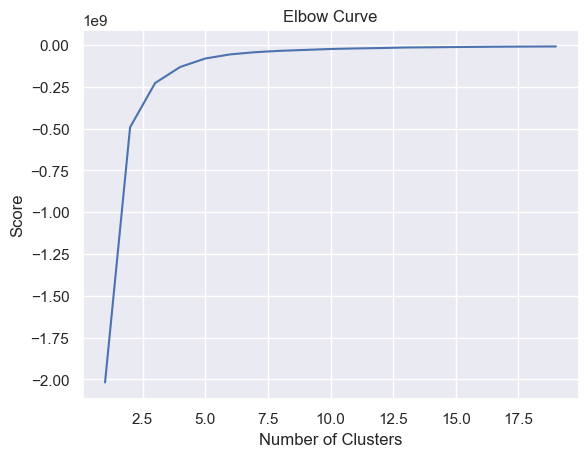

In [105]:
## Observo el codo para explorar
Nc = range(1, 20)
kmeans = [KMeans(n_clusters=i) for i in Nc]
kmeans
score = [kmeans[i].fit(X).score(X) for i in range(len(kmeans))]
score
plt.plot(Nc,score)
plt.xlabel('Number of Clusters')
plt.ylabel('Score')
plt.title('Elbow Curve')
plt.show()


In [112]:
kmeans = KMeans(n_clusters=3).fit(X)
centroids = kmeans.cluster_centers_
print(centroids)


[[ 1.72927888e+00 -1.02016996e-03  1.98778620e+00  1.45140603e+00
   6.59490912e-01  6.42539317e-01  6.72281169e-01  8.05606096e-02
   1.92754589e-02  5.66374232e-02  3.07041848e+00  2.98025617e+00
   3.15765794e+02]
 [ 1.72890489e+00 -2.56619460e-03  2.03985171e+00  1.43082527e+00
   6.50925706e-01  6.31269263e-01  6.67112098e-01  7.87766450e-02
   1.67683255e-02  6.04780481e-02  2.98583960e+00  3.14498782e+00
   5.00128026e+01]
 [ 1.82704590e+00  3.74040674e-03  2.00195861e+00  1.44664907e+00
   6.44447756e-01  6.18176786e-01  6.75657839e-01  7.80464958e-02
   1.48173380e-02  5.84816486e-02  2.96238184e+00  3.08526356e+00
   1.80293600e+02]]


In [124]:
## instancio las etiquetas
etiquetas= kmeans.labels_

In [126]:
## chequeo que funcionen bien con train
unique, counts = np.unique(etiquetas, return_counts=True)
print(dict(zip(unique, counts)))

{0: 55462, 1: 46397, 2: 47021}


#### Ahora con el test, que es lo solicitado

In [157]:
## Declaro mi x_test que tiene las mismas columnas que el train
X_test= test[['type', 'sqfeet', 'beds', 'baths', 'cats_allowed', 'dogs_allowed', 'smoking_allowed','wheelchair_access', 'electric_vehicle_charge', 'comes_furnished', 'laundry_options', 'parking_options', 'region']]


In [164]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=3, n_init=500, random_state=42).fit(X_test)
centroids = kmeans.cluster_centers_
print(centroids)



[[ 1.01656331e+00  7.43308015e-03  1.91467148e+00  1.42907607e+00
   7.11672816e-01  6.95502002e-01  7.43543449e-01  8.46220268e-02
   1.13823691e-02  4.58434728e-02  2.93052830e+00  3.23125834e+00
   1.73074025e+02]
 [ 1.02439900e+00  4.22141129e-03  1.88044492e+00  1.43745963e+00
   7.49407966e-01  7.25870111e-01  7.21636168e-01  8.00143524e-02
   1.70075350e-02  4.27700036e-02  2.98478651e+00  3.10182992e+00
   3.15091712e+02]
 [ 9.13058187e-01 -1.29833706e-02  1.98782138e+00  1.41593369e+00
   7.19299729e-01  7.01792963e-01  7.31985792e-01  8.60115020e-02
   1.19248985e-02  5.64952639e-02  2.92760487e+00  3.32332544e+00
   4.92909337e+01]]


In [165]:
etiquetas_test= kmeans.labels_


In [166]:
## Obtengo las etiquetas para las 3 categorias
unique, counts = np.unique(etiquetas_test, return_counts=True)
print(dict(zip(unique, counts)))

{0: 12735, 1: 13922, 2: 11841}


In [133]:
## Obtengo un dataframe
test_pred= pd.DataFrame(etiquetas_test, columns=['pred'])

In [134]:

test_pred

,pred
0,2
1,1
2,2
3,0
4,2
...,...
38493,0
38494,2
38495,1
38496,0


In [135]:
## Exporto
test_pred.to_csv('SoleGon5.csv', index=False)

In [162]:
## Importo librerias para las metricas
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn import metrics

In [167]:
##Obtengo silhouette_score
silhouette_score( X_test,kmeans.labels_)

0.5978916239493255